In [ ]:
import math
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
url = 'https://twoldem-ml.s3.us-east-2.amazonaws.com/beer_reviews.csv'

df = pd.read_csv(url)

df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [ ]:
df[ 'review_time' ] = pd.to_datetime( df[ 'review_time' ], unit = 's' )
df.tail()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1586609,14359,The Defiant Brewing Company,2006-11-05 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,2006-10-17 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,2006-10-13 01:21:53,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,2006-10-05 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061
1586613,14359,The Defiant Brewing Company,2006-10-04 23:41:59,5.0,4.5,4.5,cbl2,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


# **Data Exploration**

In [ ]:
df.dtypes

brewery_id                     int64
brewery_name                  object
review_time           datetime64[ns]
review_overall               float64
review_aroma                 float64
review_appearance            float64
review_profilename            object
beer_style                    object
review_palate                float64
review_taste                 float64
beer_name                     object
beer_abv                     float64
beer_beerid                    int64
dtype: object

In [ ]:
for i in df.columns[df.dtypes == object].values:
    print(i, df[i].unique())

brewery_name ['Vecchio Birraio' 'Caldera Brewing Company' 'Amstel Brouwerij B. V.' ...
 'Wissey Valley Brewery' 'Outback Brewery Pty Ltd'
 'Georg Meinel Bierbrauerei KG']
review_profilename ['stcules' 'johnmichaelsen' 'oline73' ... 'hogshead' 'NyackNicky'
 'joeebbs']
beer_style ['Hefeweizen' 'English Strong Ale' 'Foreign / Export Stout'
 'German Pilsener' 'American Double / Imperial IPA' 'Herbed / Spiced Beer'
 'Light Lager' 'Oatmeal Stout' 'American Pale Lager' 'Rauchbier'
 'American Pale Ale (APA)' 'American Porter' 'Belgian Strong Dark Ale'
 'American IPA' 'American Stout' 'Russian Imperial Stout'
 'American Amber / Red Ale' 'American Strong Ale' 'Märzen / Oktoberfest'
 'American Adjunct Lager' 'American Blonde Ale' 'Euro Pale Lager'
 'English Brown Ale' 'Scotch Ale / Wee Heavy' 'Fruit / Vegetable Beer'
 'American Double / Imperial Stout' 'Belgian Pale Ale' 'English Bitter'
 'English Porter' 'Irish Dry Stout' 'American Barleywine'
 'Belgian Strong Pale Ale' 'Doppelbock' 'Maibock / H

In [ ]:
# df.info(null_counts = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1586614 non-null  int64         
 1   brewery_name        1586599 non-null  object        
 2   review_time         1586614 non-null  datetime64[ns]
 3   review_overall      1586614 non-null  float64       
 4   review_aroma        1586614 non-null  float64       
 5   review_appearance   1586614 non-null  float64       
 6   review_profilename  1586266 non-null  object        
 7   beer_style          1586614 non-null  object        
 8   review_palate       1586614 non-null  float64       
 9   review_taste        1586614 non-null  float64       
 10  beer_name           1586614 non-null  object        
 11  beer_abv            1518829 non-null  float64       
 12  beer_beerid         1586614 non-null  int64         
dtypes: datetime6

In [ ]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [ ]:
data_count = df.describe().transpose()
data_count

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586614.0,3130.099202,5578.103987,1.00,143.0,429.0,2372.0,28003.0
review_overall,1586614.0,3.815581,0.720622,0.00,3.5,4.0,4.5,5.0
review_aroma,1586614.0,3.735636,0.697617,1.00,3.5,4.0,4.0,5.0
review_appearance,1586614.0,3.841642,0.616093,0.00,3.5,4.0,4.0,5.0
review_palate,1586614.0,3.743701,0.682218,1.00,3.5,4.0,4.0,5.0
review_taste,1586614.0,3.792860,0.731970,1.00,3.5,4.0,4.5,5.0
beer_abv,1518829.0,7.042387,2.322526,0.01,5.2,6.5,8.5,57.7
beer_beerid,1586614.0,21712.794279,21818.335997,3.00,1717.0,13906.0,39441.0,77317.0


In [ ]:
# df.drop(columns=['brewery_id', "beer_beerid"], inplace=True)

In [ ]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# df.title.value_counts()  #checking to see if we need to encode title variables


In [ ]:
print( 'Unique breweries' )
print( 'By id:', df[ 'brewery_id' ].nunique() )
print( 'By name:', df[ 'brewery_name' ].nunique() )

Unique breweries
By id: 5840
By name: 5742


In [ ]:
print( 'Unique beers' )
print( 'By id:', df[ 'beer_beerid' ].nunique() )
print( 'By name:', df[ 'beer_name' ].nunique() )

Unique beers
By id: 66055
By name: 56857


In [ ]:
df[ 'review_profilename' ].value_counts().head()

northyorksammy    5817
BuckeyeNation     4661
mikesgroove       4617
Thorpe429         3518
womencantsail     3497
Name: review_profilename, dtype: int64

In [ ]:
df.shape

(1586614, 13)

In [ ]:
df.value_counts('review_overall')
# drop 0, round them up 

review_overall
4.0    582764
4.5    324385
3.5    301817
3.0    165644
5.0     91320
2.5     58523
2.0     38225
1.5     12975
1.0     10954
0.0         7
dtype: int64

# **Linear Regression Model**

In [ ]:
linear_model = LinearRegression( normalize = True )

In [ ]:
X = df[[ 'review_aroma', 'review_appearance', 'review_palate', 'review_taste' ] ]
y = df[ 'review_overall' ]
linear_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
# training the model 

preds = linear_model.predict(df[ [ 'review_aroma', 'review_appearance', 'review_palate', 'review_taste' ] ] )

In [ ]:
# Coeffifients for each feature in X 
linear_model.coef_

array([0.04780922, 0.03589102, 0.25847415, 0.55152957])

In [ ]:
# checking error in the model 
# Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
np.sqrt( mean_squared_error(df[ 'review_overall' ], preds ) )

0.4213444938684294

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y,
#                                                     test_size=0.33, 
#                                                     random_state=42)
# X_test

# **Chelsea tries logistic regression**

In [ ]:
#making two bins, "excellent" vs "not excellent"
cut_reviews = ["not excellent", "excellent"]
review_bins = [0, 3.5, 5.0]
df['excellent_reviews'] = pd.cut(df['review_overall'], bins=review_bins, labels= cut_reviews)
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,excellent_reviews
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,not excellent
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,not excellent
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,not excellent
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,not excellent
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,excellent


In [ ]:
from sklearn.linear_model           import LogisticRegression
import numpy as np
from sklearn                        import metrics, svm
df['excellent_reviews'].value_counts()

excellent        998469
not excellent    588138
Name: excellent_reviews, dtype: int64

In [ ]:
df_logistic = df.dropna()
x = df_logistic.excellent_reviews.values.reshape(-1, 1)
Y = df_logistic.beer_abv.values.reshape(-1, 1)


print("Shape: ", x.shape, Y.shape)


Shape:  (1518471, 1) (1518471, 1)


In [ ]:
x = df_logistic['beer_abv']
Y = df_logistic['excellent_reviews']
Y = df_logistic['excellent_reviews'].values.reshape(-1, 1)
x = df_logistic['beer_abv'].values.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.33, random_state=42)
logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(x_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/__init__.py:199: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return array[key] if axis == 0 else array[:, key]
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred = logreg.predict(x_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, Y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[   426 182620]
 [    94 317956]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.00      0.00    183046
           1       0.64      1.00      0.78    318050

    accuracy                           0.64    501096
   macro avg       0.73      0.50      0.39    501096
weighted avg       0.70      0.64      0.49    501096



In [ ]:

print("Training set score: {:.3f}".format(logreg.score(x_train, Y_train))) 
print("Test set score: {:.3f}".format(logreg.score(x_test, Y_test)))

Training set score: 0.635
Test set score: 0.635


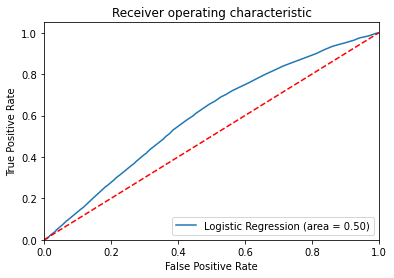

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
predictions = linear_model.predict(x)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

ValueError: ignored

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [ ]:
# pd.crosstab(df_logistic.excellent_reviews,df_logistic.beer_abv).plot(kind='bar')
# plt.title('Excellent Beer Ratings by ABV')
# plt.xlabel('Excellent Category')
# plt.ylabel('ABV')


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.linear_model           import LogisticRegression
#### GRIDSEARCH #### 
#Hypertuning parameters
logreg()

In [ ]:
param_grid = {'max_iter': [100, 1000, 2000], 'solver': ['newton-cg','sag', 'saga'], 'C': [0.001, 0.01, 0.1], 'penalty': ['l2','l1']}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0)
grid.fit( x_train, Y_train)
print(grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local

{'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
# logmodel = LogisticRegression('C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg')
logmodel = LogisticRegression(grid.best_params_)
# next .fit, then 
logreg.fit(x_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred = logreg.predict(x_test)

In [ ]:
mse1 = mean_squared_error(Y_test, Y_pred)
rmse1 = np.sqrt(mse1)
rmse1

0.6038449584251544

# **Graphs**

In [ ]:
import plotly.express as px

fig = px.parallel_coordinates(df, color="review_overall", 
          labels=dict(zip(list(df.columns), 
          list(['_'.join(i.split('_')[1:]) for i in df.columns]))),
          color_continuous_scale=px.colors.diverging.Tealrose,
          color_continuous_midpoint=27)

fig.show()

# **Other Models to test?**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import pandas as pd

In [ ]:
predictions = linear_model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [ ]:
import numpy as np
from sklearn                        import metrics, svm
# from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
# clf = LinearRegression()
# clf.fit(trainingData, trainingScores)
# print("LinearRegression")
# print(clf.predict(predictionData))

clf = svm.SVR()
clf.fit(trainingData, trainingScores)
print("SVR")
print(clf.predict(predictionData))

clf = LogisticRegression()
clf.fit(trainingData, trainingScores)
print("LogisticRegression")
print(clf.predict(predictionData))

clf = DecisionTreeClassifier()
clf.fit(trainingData, trainingScores)
print("DecisionTreeClassifier")
print(clf.predict(predictionData))

clf = KNeighborsClassifier()
clf.fit(trainingData, trainingScores)
print("KNeighborsClassifier")
print(clf.predict(predictionData))

clf = LinearDiscriminantAnalysis()
clf.fit(trainingData, trainingScores)
print("LinearDiscriminantAnalysis")
print(clf.predict(predictionData))

clf = GaussianNB()
clf.fit(trainingData, trainingScores)
print("GaussianNB")
print(clf.predict(predictionData))

clf = SVC()
clf.fit(trainingData, trainingScores)
print("SVC")
print(clf.predict(predictionData))

In [ ]:
#katietest

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm